In [ ]:
#161805041
#UĞUR CAN KÖK
#Course : Introduction to Neuroscience
#Howework : Prediction to average price for avacoda using Recurrent Neural Network

In my homework I will make avocado price estimation using avocado dataset and I will use RNN while doing this homework. Let me talk a little bit about RNN. Normally we have an input layer, a hidden layer and finally an output layer in the artificial neural network. Inputs are coming and these inputs are assigned random weight value and the system starts to be trained. After arriving at the last hidden layer, he comes to the output, and backpropagation from there. Thanks to backpropagation, the system continues to learn by updating the weight values ​​determined in the input layer. This applies to the general artificial neural network, but the RNN also differs slightly when the basically works this way. Recurrent Neural Network remembers the past and it’s decisions are influenced by what it has learnt from the past. While RNNs learn similarly while training, in addition, they remember things learnt from prior input (s) while generating output (s). It’s part of the network. RNNs can take one or more input vectors and produce one or more output vectors and the output (s) are influenced not just by weights applied on inputs like a regular NN, but also by a “hidden” state vector representing the context based on prior input (s) / output (s). So, the same input could produce a different output depending on previous inputs in the series.
So far, everything is going well, but we come across a concept called vanishing gradient problem. We can call this problem briefly the problem of not learning. As I mentioned, the randomly assigned weight values ​​in artificial neural networks are updated and learned in this way thanks to backpropagation. As it is known, we have hidden layers. Name of deep learning is deep because it is learning deep, but this is not always the case. I mean, when we have too many hidden layers, when doing backpropagation, there is a negligible little change in the initial weight value. Therefore, the system cannot learn because the change in the weight value in the previous situation and the weight value after backpropagation is very very low. We call this problem a vanishing gradient problem. In CNN, we use shortcuts to avoid this situation using ResNet, but RNN uses LSTM to prevent this problem. I used LSTM while carrying out my project. Now let's look at what I do step by step. While I am doing my project, I used the Google Colab.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
# First off all we should start with data preprocessing
# Import basic library to image the data and do some basic operations.

import numpy as np
import matplotlib.pyplot as plt #using to visualize the data
import pandas as pd
import seaborn as sns # another tool for visualizing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing the train dataset
dataset = pd.read_csv('/content/drive/My Drive/avocado.csv')
dataset.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [ ]:
dataset.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
dataset.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


As we see the our dataset we have 18249 row. I think it is enough for deep learning. We have 13 columns which are Date, AveragePrice, Total Volume etc..
We want to predict the average price of avocado using the these colums. I will start with visualize the dataset to better understand what kind of information we have.

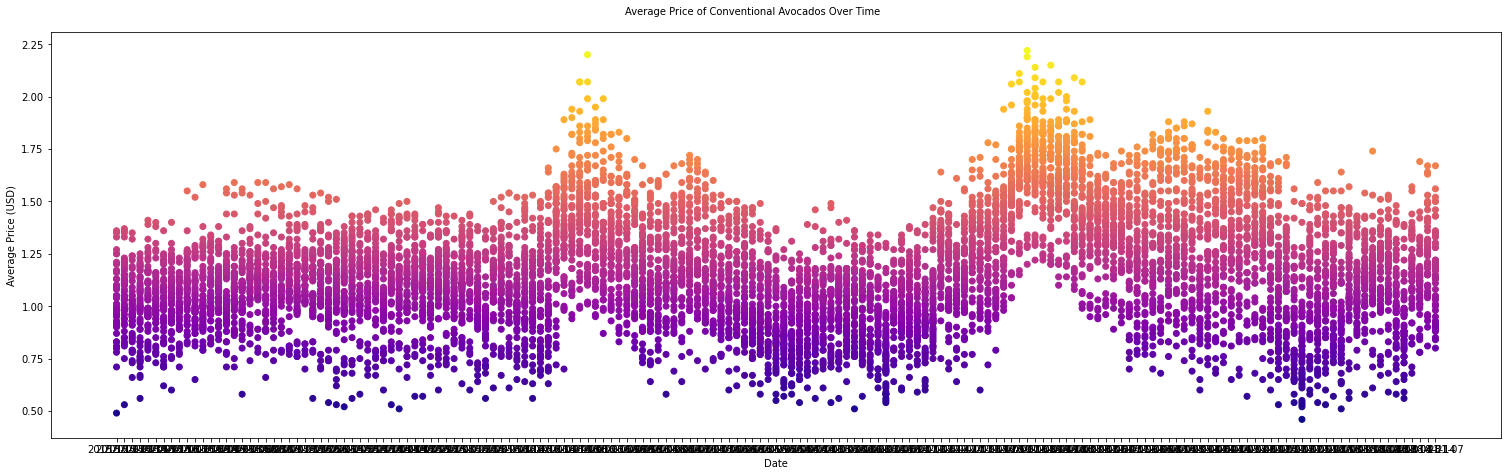

In [ ]:
#Here I visualized the our data average price according to date
mask = dataset['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=10)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = dataset[mask]['Date'].tolist()
avgPrices = dataset[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 10)
ax.set_ylabel('Average Price (USD)', fontsize = 10)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


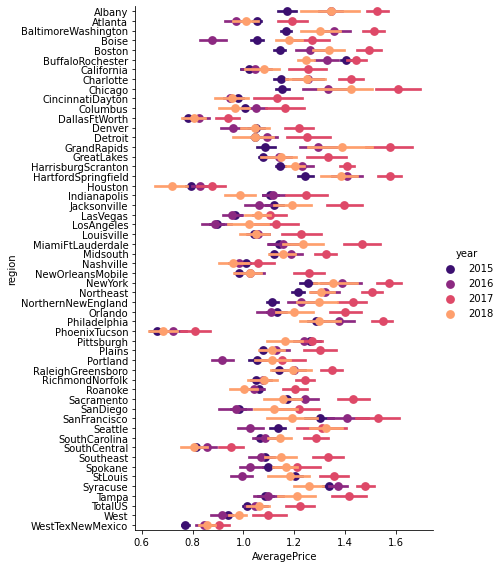

In [ ]:
#I visualized the average price according to cities
mask = dataset['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=dataset[mask],
                   hue='year',
                   size=8,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

In [ ]:
#Here we should split our dataset as train and test test.
from sklearn.model_selection import train_test_split

dataset=dataset.drop(['Unnamed: 0'],1) #We do not need the 'Unnamed:0' so we dropout that column
dataset_train, dataset_test = train_test_split(dataset, train_size=0.8, test_size=0.2, shuffle=True) #shuffle true because to select different data each time the program runs
print("Train and Test size", len(dataset_train), len(dataset_test))
training_set = dataset_train.iloc[:, 1:2].values #when we predict the average price date useless for us so we do not take the date. iloc is best for that.
test_set = dataset_test.iloc[:, 1:2].values #samething with train set

Train and Test size 14599 3650


In [ ]:
#To check drop is working or not. It seems working.
dataset.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#To check date is in training_set or not. It seems no problem
training_set

array([[1.05],
       [1.59],
       [1.86],
       ...,
       [1.96],
       [2.01],
       [1.38]])

In [ ]:
test_set.shape

(3650, 1)

In [ ]:
# As we can see the our values in dataset we sholud normalize the all values. We are doing that using Standardization or MinMaxScaler. 
#I am using MinMaxScaling. Normalization is called Feature Scaling in machine learning.

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output. timesteps are important. Otherwise it leads to overfitting if you can't find the right number.
#You can choose another number for timestep. 
X_train = []
y_train = []

#Since I choose timestep 60, the loop starts from the 60th value until the last element.
for i in range(60,14539): # we get 14539 from our dataset.
    X_train.append(training_set_scaled[i-60:i,0]) #The reason for being i-60 is I started from 60 to get 0. 
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(14479, 60)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #first variable batch size, second one timestep, and the last one input_dim. 3D tensor

In [ ]:
X_train.shape

(14479, 60, 1)

In [ ]:
#Same thing for test set
X_test = []
Y_test = []

#Since I choose timestep 60, the loop starts from the 60th value until the last element.
for i in range(60,3590): # we get 3590 from our dataset.
    X_test.append(test_set_scaled[i-60:i,0]) #The reason for being i-60 is I started from 60 to get 0. 
    Y_test.append(test_set_scaled[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [ ]:
X_test.shape

(3530, 60)

In [ ]:
# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #first variable batch size, second one timestep, and the last one input_dim. 3D tensor

In [ ]:
X_test.shape

(3530, 60, 1)

In [ ]:
# Building The RNN with LSTM
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and  Dropout regularisation
# return_sequence becomes true because after the first layer we will add another layer after it.
# input_shape reshape value
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #avoid overfitting, 10 neurons will dropout in each iterations forward and backward propagations

In [ ]:
# Adding the second LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the third LSTM layer and  Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# To check our model
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [ ]:
# Fitting the RNN to the Training set
timeline = regressor.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data=(X_test,Y_test), shuffle = True)

Train on 14479 samples, validate on 3530 samples
Epoch 1/10
14479/14479 [==============================] - 46s 3ms/step - loss: 0.0234 - val_loss: 0.0205
Epoch 2/10
14479/14479 [==============================] - 46s 3ms/step - loss: 0.0234 - val_loss: 0.0204
Epoch 3/10
14479/14479 [==============================] - 45s 3ms/step - loss: 0.0233 - val_loss: 0.0206
Epoch 4/10
14479/14479 [==============================] - 45s 3ms/step - loss: 0.0233 - val_loss: 0.0204
Epoch 5/10
14479/14479 [==============================] - 44s 3ms/step - loss: 0.0233 - val_loss: 0.0205
Epoch 6/10
14479/14479 [==============================] - 44s 3ms/step - loss: 0.0232 - val_loss: 0.0205
Epoch 7/10
14479/14479 [==============================] - 44s 3ms/step - loss: 0.0232 - val_loss: 0.0211
Epoch 8/10
14479/14479 [==============================] - 44s 3ms/step - loss: 0.0232 - val_loss: 0.0204
Epoch 9/10
14479/14479 [==============================] - 45s 3ms/step - loss: 0.0232 - val_loss: 0.0206
Epoch 

Text(0, 0.5, 'Loss')

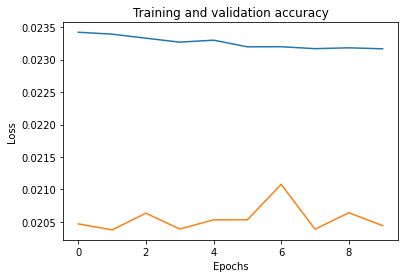

In [ ]:
plt.plot(timeline.history['loss'])
plt.plot(timeline.history['val_loss'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 

In [ ]:
predicted_avocado_price = regressor.predict(X_test)
predicted_avocado_price = sc.inverse_transform(predicted_avocado_price)
predicted_avocado_price

array([[1.4274958],
       [1.4275178],
       [1.4275507],
       ...,
       [1.4275383],
       [1.4275966],
       [1.4276146]], dtype=float32)

In [ ]:
# Fitting the RNN to the Training set
timeline = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data=(X_test,Y_test), shuffle = True)

Train on 14479 samples, validate on 3530 samples
Epoch 1/50
14479/14479 [==============================] - 66s 5ms/step - loss: 0.0255 - val_loss: 0.0205
Epoch 2/50
14479/14479 [==============================] - 65s 4ms/step - loss: 0.0239 - val_loss: 0.0215
Epoch 3/50
14479/14479 [==============================] - 65s 4ms/step - loss: 0.0237 - val_loss: 0.0208
Epoch 4/50
14479/14479 [==============================] - 64s 4ms/step - loss: 0.0236 - val_loss: 0.0205
Epoch 5/50
14479/14479 [==============================] - 66s 5ms/step - loss: 0.0235 - val_loss: 0.0204
Epoch 6/50
14479/14479 [==============================] - 66s 5ms/step - loss: 0.0233 - val_loss: 0.0204
Epoch 7/50
14479/14479 [==============================] - 65s 5ms/step - loss: 0.0233 - val_loss: 0.0204
Epoch 8/50
14479/14479 [==============================] - 66s 5ms/step - loss: 0.0233 - val_loss: 0.0206
Epoch 9/50
14479/14479 [==============================] - 65s 5ms/step - loss: 0.0233 - val_loss: 0.0209
Epoch 

Text(0, 0.5, 'Loss')

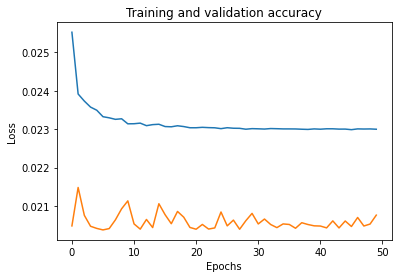

In [ ]:
plt.plot(timeline.history['loss'])
plt.plot(timeline.history['val_loss'])
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 

In [ ]:
predicted_avocado_price = regressor.predict(X_test)
predicted_avocado_price = sc.inverse_transform(predicted_avocado_price)
predicted_avocado_price

array([[1.459553 ],
       [1.4595534],
       [1.4595535],
       ...,
       [1.4595543],
       [1.4595541],
       [1.4595535]], dtype=float32)

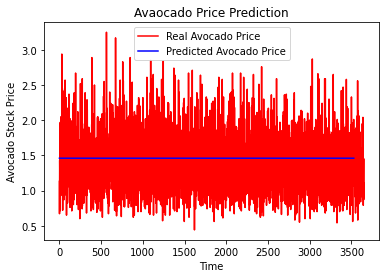

In [ ]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Avocado Price')
plt.plot(predicted_avocado_price, color = 'blue', label = 'Predicted Avocado Price')
plt.title('Avaocado Price Prediction')
plt.xlabel('Time')
plt.ylabel('Avocado Stock Price')
plt.legend()
plt.show()

As a result, when I train the data for the first time, the number of epoch is 10, the loss value is 0.0232, the val_loss value is 0.0204 and the forecast value is around 1.42. When I make the number of epochs 50, batch_size 32, the result loss value is 0.0230, the validation value is 0.0208 and the prediction value is around 1.45. In other words, the results show that the data does not show overfit status, but I have encountered underfitting status. If we set the dataepoch number to 100 or more, the loss value will probably decrease further and our estimation value will increase even more. Everything seems normal in my model, of course, it is necessary to train more data because I can not say that I could not reach the magnificent estimate value as it appears in the last graphic.